In [2]:
import pandas as pd
import os
data_file = r'D:\images\tnia-python-images\imagesc\2025_06_02_check_ABRF_labels\coordinate_data_deidentified.csv'

data = pd.read_csv(data_file)
print(data.shape)
nuclei = data[data.csv_path.str.contains('nuclei', na=False)]
print(nuclei.shape)
data.head()

(108703, 6)
(544, 6)


,x,y,z,intensity,volume,csv_path
0,22.803,9.024,4.181,56620971.0,437.896,Q6.13/R_3Rxaf07hES8CPgE_nuclei1.csv
1,5.669,9.164,5.376,63811635.0,482.954,Q6.13/R_3Rxaf07hES8CPgE_nuclei1.csv
2,24.999,8.223,13.036,57406958.0,441.048,Q6.13/R_3Rxaf07hES8CPgE_nuclei1.csv
3,13.722,23.521,8.778,78224458.0,522.320,Q6.13/R_3Rxaf07hES8CPgE_nuclei1.csv
4,22.547,26.006,9.65,69841365.0,473.768,Q6.13/R_3Rxaf07hES8CPgE_nuclei1.csv


In [3]:


ground_truth_file = r'D:\images\tnia-python-images\imagesc\2025_06_02_check_ABRF_labels\ground_truth_coords.csv'

ground_truth = pd.read_csv(ground_truth_file)
# Display the first few rows of the ground truth data
ground_truth['base_name'] = ground_truth['path'].apply(os.path.basename)
ground_truth.head()

,Unnamed: 0,x,y,z,path,base_name
0,0,5.628644,9.198676,8.751923,../../ground truth/nuclei/out_c00_dr90_label.tif,out_c00_dr90_label.tif
1,1,22.816774,9.033185,6.689963,../../ground truth/nuclei/out_c00_dr90_label.tif,out_c00_dr90_label.tif
2,2,22.618367,26.020343,15.707744,../../ground truth/nuclei/out_c00_dr90_label.tif,out_c00_dr90_label.tif
3,3,13.676880,23.516335,14.263662,../../ground truth/nuclei/out_c00_dr90_label.tif,out_c00_dr90_label.tif
4,4,25.001824,8.219340,21.236781,../../ground truth/nuclei/out_c00_dr90_label.tif,out_c00_dr90_label.tif


In [4]:
friendly_names = {
    'out_c00_dr10_label.tif': 'nuclei3',
    'out_c00_dr90_label.tif': 'nuclei1',
    'out_c90_dr10_label.tif': 'nuclei4',
    'out_c90_dr90_label.tif': 'nuclei2',

    'Q6.13': 'nuclei1',
    'Q7.13': 'nuclei2',
    'Q8.13': 'nuclei3',
    'Q9.13': 'nuclei4',
    }


In [5]:
for name in friendly_names:
    test = ground_truth[ground_truth['base_name'] == name]
    print(f'there are {len(test)} rows for {name}')

there are 5 rows for out_c00_dr10_label.tif
there are 5 rows for out_c00_dr90_label.tif
there are 5 rows for out_c90_dr10_label.tif
there are 5 rows for out_c90_dr90_label.tif
there are 0 rows for Q6.13
there are 0 rows for Q7.13
there are 0 rows for Q8.13
there are 0 rows for Q9.13


In [46]:
test = nuclei.csv_path.unique()
print(f'there are {len(test)} unique nuclei csv paths')

nuclei_to_find_string = 'nuclei4'
key = next(k for k, v in friendly_names.items() if v == nuclei_to_find_string)
print(key)  # Output: 'out_c00_dr10_label.tif'

nuclei_to_find = nuclei[nuclei.csv_path.str.contains(nuclei_to_find_string, na=False)]
print(f'there are {nuclei_to_find.shape[0]} rows for nuclei4')
print(f'there are {len(nuclei_to_find.csv_path.unique())} unique nuclei4 csv paths')

ground_truth_to_find = ground_truth[ground_truth['base_name'] == key]
print(f'there are {ground_truth_to_find.shape[0]} rows for {key}')

there are 86 unique nuclei csv paths
out_c90_dr10_label.tif
there are 114 rows for nuclei4
there are 20 unique nuclei4 csv paths
there are 5 rows for out_c90_dr10_label.tif


In [47]:
import numpy as np
from scipy.spatial import distance_matrix
from scipy.optimize import linear_sum_assignment

def compute_lsa_distance(ground, test):
    # Calculate the distance matrix and perform linear sum assignment
    test = test[:ground.shape[0]]  # Ensure test has the same number of points as ground
    dm = distance_matrix(ground, test)
    lsa = linear_sum_assignment(dm)
    displacement = ground[lsa[0]] - test[lsa[1]]
    distance = np.sqrt(np.sum(displacement**2, axis=1))

    lsa_mean = np.mean(distance)
    lsa_mse = np.mean(distance**2)

    return ground, test, lsa_mse

In [50]:
num_bad = 0
num_good = 0

answers = []

for nuclei_to_find_string in ['nuclei1', 'nuclei2', 'nuclei3', 'nuclei4']:
    test = nuclei.csv_path.unique()
    print(f'there are {len(test)} unique nuclei csv paths')

    #nuclei_to_find_string = 'nuclei4'
    key = next(k for k, v in friendly_names.items() if v == nuclei_to_find_string)
    print(key)  # Output: 'out_c00_dr10_label.tif'

    nuclei_to_find = nuclei[nuclei.csv_path.str.contains(nuclei_to_find_string, na=False)]
    print(f'there are {nuclei_to_find.shape[0]} rows for nuclei4')
    print(f'there are {len(nuclei_to_find.csv_path.unique())} unique nuclei4 csv paths')

    ground_truth_to_find = ground_truth[ground_truth['base_name'] == key]
    print(f'there are {ground_truth_to_find.shape[0]} rows for {key}')

    for name in nuclei_to_find.csv_path.unique():
        temp = nuclei_to_find[nuclei_to_find.csv_path == name]
        
        print(temp[['x', 'y', 'z']])

        print(ground_truth_to_find[['x', 'y', 'z']])

        temp = temp[['x', 'y', 'z']].fillna(0).astype(float)

        _, _, lsa_mean = compute_lsa_distance(
            ground_truth_to_find[['x', 'y', 'z']].values,
            temp[['x', 'y', 'z']].fillna(0).values.astype(float)
        )

        ground_truth_to_find_corrected = ground_truth_to_find.copy()

        if temp.x.max() > 40:
            temp['x'] = temp['x']*(.124)
            temp['y'] = temp['y']*(.124)
            temp['z'] = temp['z']*(.2)
        ground_truth_to_find_corrected['z'] = ground_truth_to_find['z']*(.124/.2)

        print(ground_truth_to_find_corrected[['x', 'y', 'z']])
        
        _, _, lsa_mean_corrected = compute_lsa_distance(
            ground_truth_to_find_corrected[['x', 'y', 'z']].values,
            temp[['x', 'y', 'z']].fillna(0).values.astype(float)
        )

        if lsa_mean_corrected < 1.0:
            num_good += 1
        else:
            num_bad += 1
        print(f'num_good: {num_good}, num_bad: {num_bad}')

        answers.append(lsa_mean_corrected)

        print(f'lsa mean: {lsa_mean}')
        print(f'lsa mean corrected: {lsa_mean_corrected}')
        print('=======================================================')

there are 86 unique nuclei csv paths
out_c00_dr90_label.tif
there are 130 rows for nuclei4
there are 25 unique nuclei4 csv paths
there are 5 rows for out_c00_dr90_label.tif
        x       y       z
0  22.803   9.024   4.181
1   5.669   9.164   5.376
2  24.999   8.223  13.036
3  13.722  23.521   8.778
4  22.547  26.006    9.65
           x          y          z
0   5.628644   9.198676   8.751923
1  22.816774   9.033185   6.689963
2  22.618367  26.020343  15.707744
3  13.676880  23.516335  14.263662
4  25.001824   8.219340  21.236781
           x          y          z
0   5.628644   9.198676   5.426192
1  22.816774   9.033185   4.147777
2  22.618367  26.020343   9.738801
3  13.676880  23.516335   8.843471
4  25.001824   8.219340  13.166804
num_good: 1, num_bad: 0
lsa mean: 30.348757695678138
lsa mean corrected: 0.008677568238877938
          x         y        z
5  22.88310   9.07639  4.27593
6   5.65736   9.18127  5.51989
7  14.00880  23.75340   8.8713
8  22.29150  26.12610  9.75919
9 

In [52]:
len(answers)

82

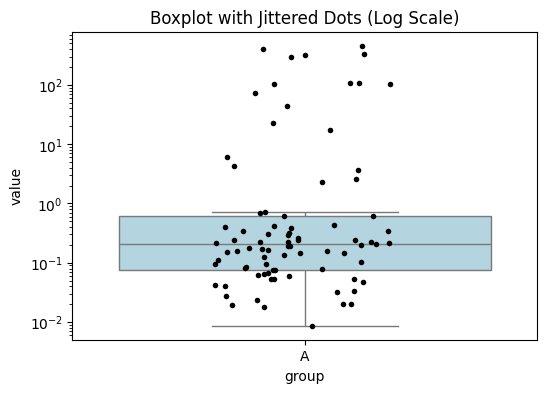

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Make log-distributed data (only positive values!)
data = answers #np.random.lognormal(mean=2, sigma=0.4, size=100)

# Put data in a DataFrame for seaborn
df = pd.DataFrame({'value': data, 'group': ['A'] * len(data)})

# Create plot
plt.figure(figsize=(6, 4))
sns.boxplot(x='group', y='value', data=df, showfliers=False, color='lightblue')
sns.stripplot(x='group', y='value', data=df, color='black', size=4, jitter=0.2)

# Set y-axis to log scale
plt.yscale('log')
plt.title('Boxplot with Jittered Dots (Log Scale)')
plt.show()

In [63]:
print(answers.sort())
print(answers)

None
[0.008677568238877938, 0.017998895080774943, 0.019527803765608143, 0.01997932350084383, 0.020229883049893607, 0.02394466740762676, 0.02735647724687589, 0.032290879958573646, 0.03385623344533705, 0.041243087801639426, 0.0414021617353813, 0.04817221504331017, 0.053137404475674575, 0.05382565078691439, 0.054243612360561355, 0.0587797424378181, 0.06279526023194637, 0.06408436503978313, 0.06838237460909938, 0.07412730209230922, 0.07530258904316034, 0.07995289471326407, 0.08166177437933084, 0.08353669965764454, 0.09452940908219436, 0.09505391754227573, 0.10492297069307746, 0.11227868447829359, 0.12689490441065357, 0.13661791450066127, 0.14435608909882977, 0.14601843411255874, 0.15075629645810232, 0.15599702968907453, 0.1576990039149062, 0.16313590523212346, 0.16809977382169566, 0.17999787386102617, 0.19096443716830652, 0.1948663015331301, 0.2017827058743013, 0.21140572140384858, 0.21665861315188534, 0.2182425816884715, 0.22236814084446, 0.22604460162228707, 0.2276923298999729, 0.2400551

In [54]:
min(answers), max(answers), np.mean(answers), np.std(answers)

(0.008677568238877938, 457.8904940741767, 29.32999178176608, 88.73766499631739)

In [56]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
